In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import requests

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#### 1.Посмотрим на распределение посещений сайта по дням. Построим график с распределением количества посещений от ботов и обычных пользователей сайта Яндекс.Метрика

In [2]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-b-dzhumaeva-37/project_6_python/step_1_lesson_7.csv')

In [3]:
df

,date,user_type,visits
0,2020-06-15,People,417.0
1,2020-06-15,Robots,177.0
2,2020-06-16,People,472.0
3,2020-06-16,Robots,91.0
4,2020-06-17,People,475.0
5,2020-06-17,Robots,138.0


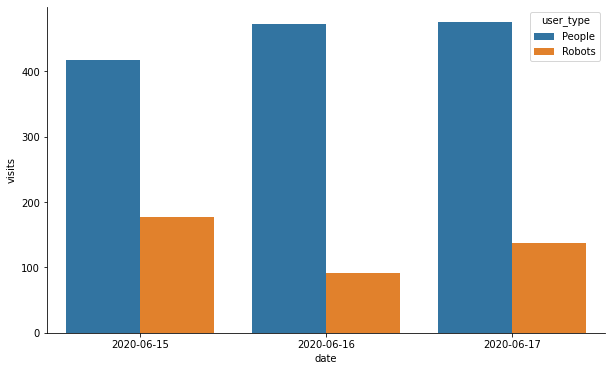

In [5]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=df, x='date', y='visits', hue='user_type', ax=ax)
sns.despine()

* Наименьшее число посещений пользователей-людей наблюдается 15 июня
* Наибольшая разница между числом посещений людьми и ботами наблюдается 16 июня
* 15 июня сайт посетило наибольшее число ботов
* 15 июня ботов было примерно в два раза больше, чем 16 июня

#### 2. Определим процент посещений сайта Яндекс.Метрики с бразузера Google Chrome.

In [6]:
df2 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-b-dzhumaeva-37/project_6_python/step_2_lesson_7.csv')

In [7]:
df2.head()

,date,browser,visits
0,2020-06-15,Google Chrome,354.0
1,2020-06-15,Firefox,58.0
2,2020-06-15,Yandex Browser,54.0
3,2020-06-15,Safari,41.0
4,2020-06-15,Chrome Mobile,31.0


In [8]:
df2.loc[df2.browser == 'Google Chrome'].visits.iloc[0]

354.0

In [10]:
percent_visits = df2.loc[df2.browser == 'Google Chrome']['visits'].iloc[0] / df2.visits.sum() * 100

In [11]:
np.round(percent_visits, 0)

60.0

#### 3. Выясним, с какого браузера приходит больше всего ботов. Посмотрим на данные и определим, у какого браузера самая большая доля посещений сайта ботами от общего числа посещений в этом браузере?

In [12]:
df3 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-b-dzhumaeva-37/project_6_python/step_3_lesson_7.csv')

In [13]:
df3.head()

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0


In [24]:
visits_by_us = df3.groupby(['browser', 'user_type']).visits.sum()
visits_by_us.head()

browser          user_type
Android Browser  People        1.0
Chrome Mobile    People       31.0
Chromium         People        1.0
                 Robots        1.0
CocCoc           People        1.0
Name: visits, dtype: float64

In [25]:
visits_browser_t = df3.groupby(['browser']).visits.sum()
visits_browser_t.head()

browser
Android Browser     1.0
Chrome Mobile      31.0
Chromium            2.0
CocCoc              1.0
Edge                5.0
Name: visits, dtype: float64

In [26]:
shares = visits_by_us / visits_browser_t

In [28]:
shares.loc[:, 'Robots'].sort_values(ascending=False)

browser
UCWEB               1.000000
Safari              0.536585
Firefox             0.534483
Chromium            0.500000
Opera               0.312500
Google Chrome       0.293785
Edge                0.200000
Yandex Browser      0.129630
Samsung Internet    0.111111
Mobile Safari       0.062500
Name: visits, dtype: float64

#### 4. Выгрузим данные, содержащие информацию о дне, типе пользователя, браузере. Создадим колонку с метрикой доли заходов на сайт для каждого из этих разрезов.

In [30]:
df4 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-b-dzhumaeva-37/project_6_python/step_4_lesson_7.csv')

In [31]:
df4.head()

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0


In [33]:
df4['share'] = ((df4.visits / df4.visits.sum())*100).round(3)
df4

,date,browser,user_type,visits,share
0,2020-06-15,Google Chrome,People,250.0,42.088
1,2020-06-15,Google Chrome,Robots,104.0,17.508
2,2020-06-15,Yandex Browser,People,47.0,7.912
3,2020-06-15,Firefox,Robots,31.0,5.219
4,2020-06-15,Chrome Mobile,People,31.0,5.219
5,2020-06-15,Firefox,People,27.0,4.545
6,2020-06-15,Safari,Robots,22.0,3.704
7,2020-06-15,Safari,People,19.0,3.199
8,2020-06-15,Mobile Safari,People,15.0,2.525
9,2020-06-15,Opera,People,11.0,1.852


#### 5. При помощи библиотеки gspread отправим данные из предыдущего шага в Google SpreadSheet. Отправим ссылку на получившийся файл в Google SpreadSheet при помощи VK API себе в личку ВКонтакте.

In [34]:
import vk_api
import gspread
from df2gspread import df2gspread as d2g
from oauth2client.service_account import ServiceAccountCredentials

In [35]:
scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']

path_to_credential = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-b-dzhumaeva-37/project_6_python/graphic-nucleus-377115-345b6b40882d.json' 

credentials = ServiceAccountCredentials.from_json_keyfile_name(path_to_credential, scope)
gs = gspread.authorize(credentials)

In [37]:
spreadsheet_id = '1eC63CUAVXcJdT4iZC0IoDhbLmjHsjzju3wXWKwYY4RQ' #указывается id таблицы/ получилось!!!
sheet = 'project_6'
d2g.upload(df4, spreadsheet_id, sheet, credentials=credentials, row_names=True)

<Worksheet 'project_6' id:113536845>

In [38]:
token = 'vk1.a.1nkyJhATWPVEspmmYQcFPAS_P6dXWUBp0mMjJowp-zHSjiBfXtWMbWjzt0q6zWsFlMP2cKPNkRUJfG6w83wwxZnHeOB4Iug1Fk2XY-jQ5Ezqy_13B-QdBPw8EfIz711bjSCSDHV_TwH4zgBGotueINT1BtKusIy7XEnu6yrPxTd3B33Tx1ZK7QziTlOToajUGX9DoG0EkMyZhxcS1WcApQ'

In [39]:
vk_session = vk_api.VkApi(token=token)
vk = vk_session.get_api()

In [40]:
vk.messages.send(
    chat_id=1,
    random_id=1,
    message = 'https://docs.google.com/spreadsheets/d/1eC63CUAVXcJdT4iZC0IoDhbLmjHsjzju3wXWKwYY4RQ/edit#gid=214715050')

0

#### 6. Другой аналитик уже агрегировал часть данных из метрики. Нужно объединить усилия, чтобы получить финальный отчет. Прочитаем дополнительные данные из Google SpreadSheet, объединим таблицу из предыдущего шага с таблицей аналитика и посчитаем количество визитов на человека (отношение visits к users) в разрезе по браузеру и значениям Robots/People.

читаем данные другого аналитика

In [41]:
from io import BytesIO
import requests
r = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vQWMsvBTVio9C7IOOxfFO9C15BRHyME-_ENHqBodDOjuiHwk9fCuF5hUVmDs497PZOqPYK3exdSikOK/pub?gid=1006633900&single=true&output=csv')
data = r.content

df6_1 = pd.read_csv(BytesIO(data))

In [42]:
df6_1.head()

,date,browser,user_type,users
0,2020-06-15,Google Chrome,People,240.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,44.0
3,2020-06-15,Chrome Mobile,People,30.0
4,2020-06-15,Firefox,Robots,29.0


In [44]:
df6_full = df6_1.merge(df4, on=['date', 'browser', 'user_type'], how='inner' )
df6_full.head()

,date,browser,user_type,users,visits,share
0,2020-06-15,Google Chrome,People,240.0,250.0,42.088
1,2020-06-15,Google Chrome,Robots,104.0,104.0,17.508
2,2020-06-15,Yandex Browser,People,44.0,47.0,7.912
3,2020-06-15,Chrome Mobile,People,30.0,31.0,5.219
4,2020-06-15,Firefox,Robots,29.0,31.0,5.219


In [45]:
df6_full['visits_per_user'] = (df6_full.visits/df6_full.users).round()
df6_full.head()

,date,browser,user_type,users,visits,share,visits_per_user
0,2020-06-15,Google Chrome,People,240.0,250.0,42.088,1.0
1,2020-06-15,Google Chrome,Robots,104.0,104.0,17.508,1.0
2,2020-06-15,Yandex Browser,People,44.0,47.0,7.912,1.0
3,2020-06-15,Chrome Mobile,People,30.0,31.0,5.219,1.0
4,2020-06-15,Firefox,Robots,29.0,31.0,5.219,1.0
